# seaborn을 이용한 데이터 시각화 Tutorial_1
* [seaborn의 공식 문서](https://seaborn.pydata.org/api.html)
* [맵플롯립 공식문서 참조](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

## 분양가 공개 데이터 로드 

In [1]:
directory = "./data/민간 아파트 분양가격 동향_20200331.csv"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.display import Image

import platform
%matplotlib inline

# 한글 폰트 설치 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
df = pd.read_csv(directory, encoding = 'CP949')

## 컬럼명 정리

In [4]:
df.rename(columns = {'분양가격(㎡)': '분양가'}, inplace = True)

* 해당 컬럼은 numeric type으로 변경

In [5]:
df['분양가'] = pd.to_numeric(df['분양가'],errors = 'coerce')

In [6]:
df.head(20)

,지역명,규모구분,연도,월,분양가
0,서울,전체,2015,10,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879.0
5,인천,전체,2015,10,3163.0
6,인천,전용면적 60㎡이하,2015,10,3488.0
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119.0
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545.0
9,인천,전용면적 102㎡초과,2015,10,3408.0


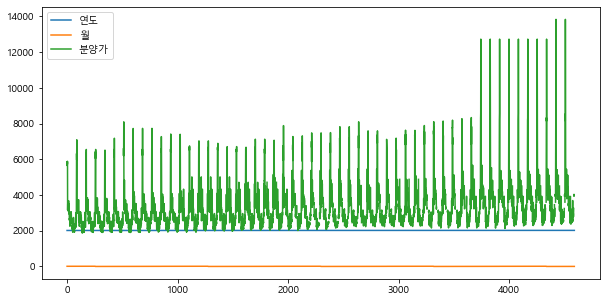

In [7]:
df.plot(figsize = (10, 5))

### 붓꽃 데이터세트 로드 

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()
irisDF = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 타이타닉 데이터셋트 로드 

In [9]:
titanic = sns.load_dataset("titanic")
titanic.head(n = 2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [10]:
titanic.loc[(titanic.who == 'woman')].describe()

,survived,pclass,age,sibsp,parch,fare
count,271.000000,271.000000,218.000000,271.000000,271.000000,271.000000
mean,0.756458,2.084871,32.000000,0.601476,0.564576,46.570711
std,0.430014,0.867196,11.495441,1.093685,1.033907,60.318995
min,0.000000,1.000000,16.000000,0.000000,0.000000,6.750000
25%,1.000000,1.000000,23.000000,0.000000,0.000000,10.500000
50%,1.000000,2.000000,30.000000,0.000000,0.000000,23.250000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,65.000000
max,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [11]:
titanic.loc[(titanic.who =='child')].describe()

,survived,pclass,age,sibsp,parch,fare
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.590361,2.626506,6.369518,1.734940,1.265060,32.785795
std,0.494757,0.619024,4.729063,1.638592,0.682255,33.466438
min,0.000000,1.000000,0.420000,0.000000,0.000000,7.225000
25%,0.000000,2.000000,2.000000,0.000000,1.000000,15.900000
50%,1.000000,3.000000,5.000000,1.000000,1.000000,26.250000
75%,1.000000,3.000000,9.500000,3.000000,2.000000,32.193750
max,1.000000,3.000000,15.000000,5.000000,2.000000,211.337500


### 변수설명
* survived: 생존여부
* pclass: 좌석등급
* sex: 성별
* age: 나이
* sibsp: 형제자매 숫자
* parch: 부모자식 숫자
* fare: 요금
* embarked: 탑승 항구
* class: 좌석등급 (영문)
* who: 사람 구분
* deck: 데크
* embark_town: 탑승 항구 (영문)
* alive: 생존여부 (영문)
* alone: 혼자인지 여부

In [12]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 변수설명
- total_bill: 총 합계 요금표
- tip: 팁
- sex: 성별
- smoker: 흡연자 여부
- day: 요일
- time: 식사 시간
- size: 식사 인원

### 1. Count plot
항목별 갯수를 세어주며 , 컬럼에 명시되어 있는 값들을 구분하여 보여줌
- [Countplot공식 문서](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [13]:
# 배경을 darkgrid로 설정
sns.set_style("darkgrid")  

 #### 1.1 세로로 그리기

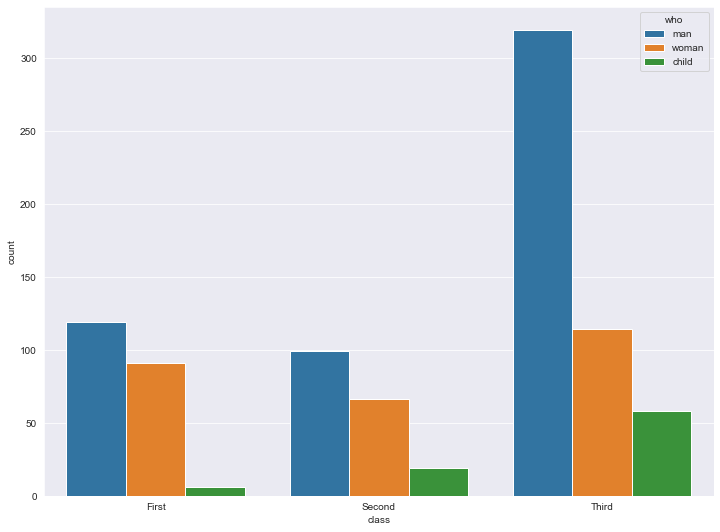

In [14]:
sns.countplot(x = 'class', hue= 'who', data = titanic)
plt.show()

#### 1.2 가로로 그리기

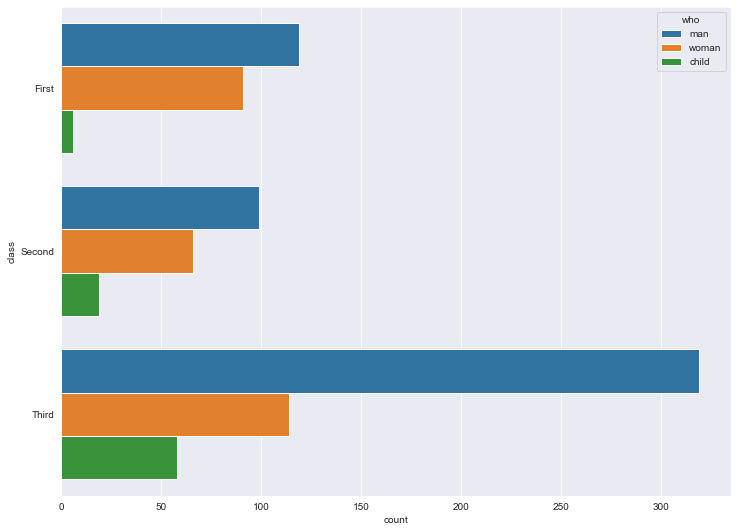

In [15]:
sns.countplot(y = 'class', hue= 'who', data = titanic)
plt.show()

#### 1-3. 색상 팔레트 설정
* 팔레트선정 Tips - 틀린값을 넣으면 에러를 보이면서 올바른값을 보여준다. 선택해서 넣어주기

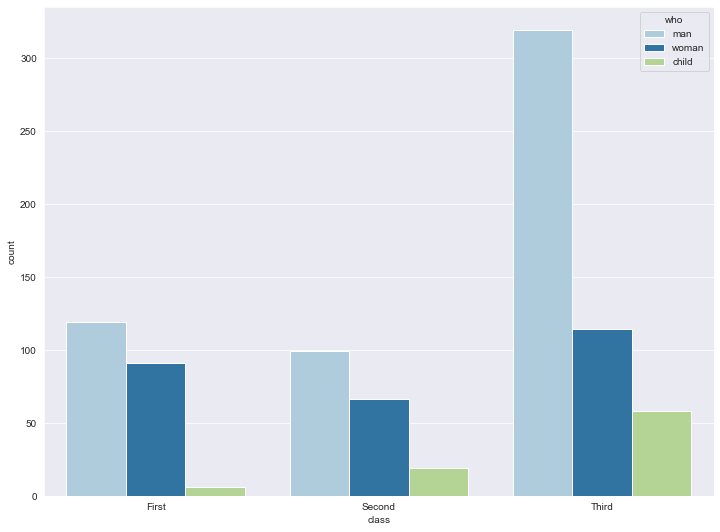

In [16]:
sns.countplot(x = 'class', hue = 'who', data = titanic, palette = "Paired")
plt.show()

### 2. displot
matplotlib의 **hist 그래프와 kdeplot을 통합한 그래프** 입니다.

분포와 밀도를 확인할 수 있습니다.

[distplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot)

In [17]:
x = np.random.randn(100) # 100개의 표준정규분포에 해당하는 수
x

array([-2.22727450e-01, -1.67892587e-01, -5.48428219e-01,  1.87234272e-01,
        6.06180099e-01, -2.82806868e-01, -9.84720378e-01,  1.09572865e-01,
        4.73860648e-01, -1.59766602e+00, -1.42142728e+00, -6.08267928e-01,
        5.65795204e-01, -8.06754772e-01,  1.53081200e+00,  5.51490591e-01,
       -4.37200022e-01, -9.57009839e-01,  1.35784057e+00,  4.28363588e-02,
       -4.76229779e-01,  3.91704634e-01,  1.27589527e+00, -9.50225468e-01,
       -2.55677523e-01,  2.13072109e+00, -8.37680646e-02, -1.01573638e+00,
       -1.99065641e-01, -4.70617662e-01,  5.48894971e-01, -1.61981357e-01,
        8.88450472e-01, -3.78486419e-01, -8.50717519e-02, -7.52565116e-01,
        2.07614313e-01,  5.82158092e-01,  1.80037932e+00,  8.07770081e-02,
       -3.82103224e-01, -1.17644930e+00, -6.45078178e-01, -6.62787909e-01,
        1.40973694e+00,  1.56511942e-01, -8.92080930e-01, -1.10998620e+00,
       -1.72069613e-01,  2.01066194e+00, -1.33305660e+00, -6.60940004e-01,
        3.95998075e-02,  

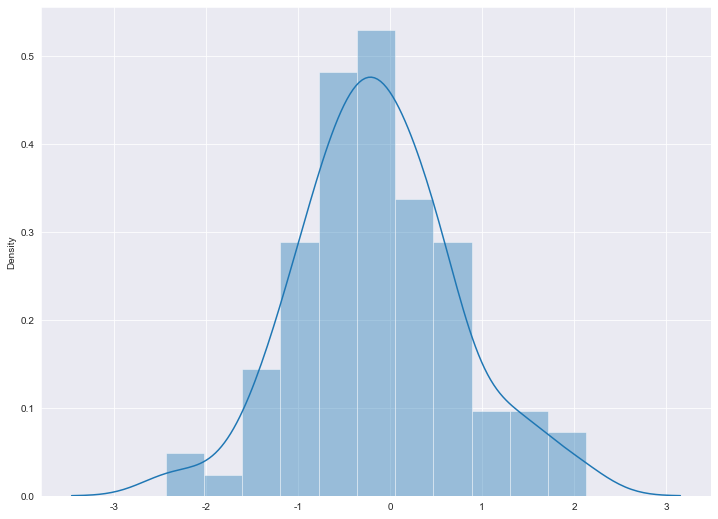

In [18]:
sns.distplot(x)
plt.show()

### 2.1 데이터가 Series일 경우

0    -0.222727
1    -0.167893
2    -0.548428
3     0.187234
4     0.606180
        ...   
95   -0.649055
96   -2.286618
97    0.377282
98   -0.001624
99   -0.512858
Name: x변수, Length: 100, dtype: float64


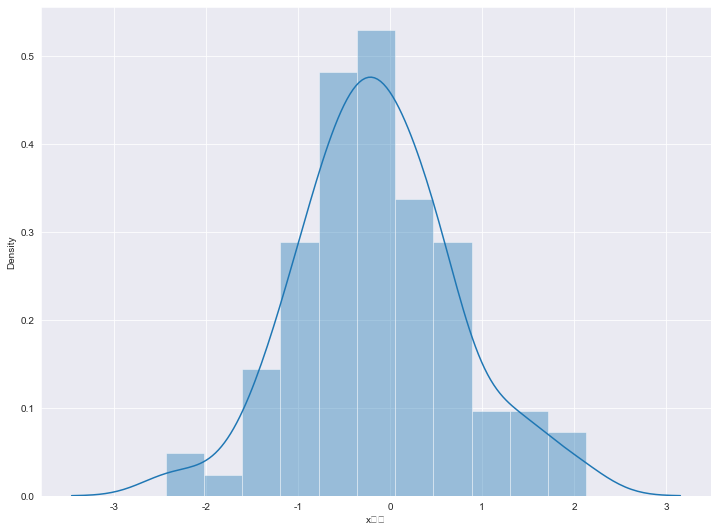

In [19]:
x = pd.Series(data = x, name = 'x변수')
print(x)

sns.distplot(x)

### 2.2  rugplot
* rug는 rugplot이라고 불리며, 데이터위치를 X축위에 작은 선분으로 나타내어 데이터의 위치 및 분포를 보여줌.(양탄자를 깔아놓은 것처럼)
* rug = False : 양탄자 안보여주기
* [rug plot API](http://seaborn.pydata.org/generated/seaborn.rugplot.htm)

In [20]:
from sklearn.datasets import load_iris
import pandas as pd

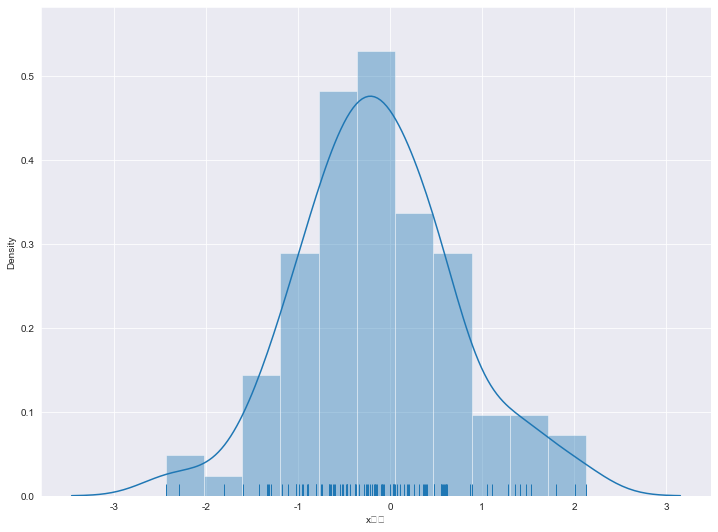

In [21]:
sns.distplot(x, rug = True, hist = True)  # hist = False는 히스토그램 보여주기 유무
plt.show()

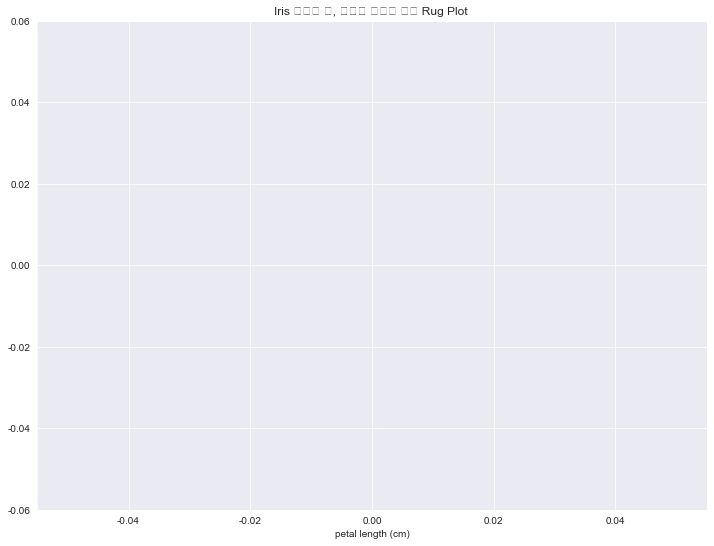

In [22]:
x = irisDF["petal length (cm)"]
sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

### 2.3 Kernel Density(KDE)
* 히스토그램보다 부드러운 곡선을 보여준다.
* [kedplot](http://seaborn.pydata.org/generated/seaborn.kdeplot.html)

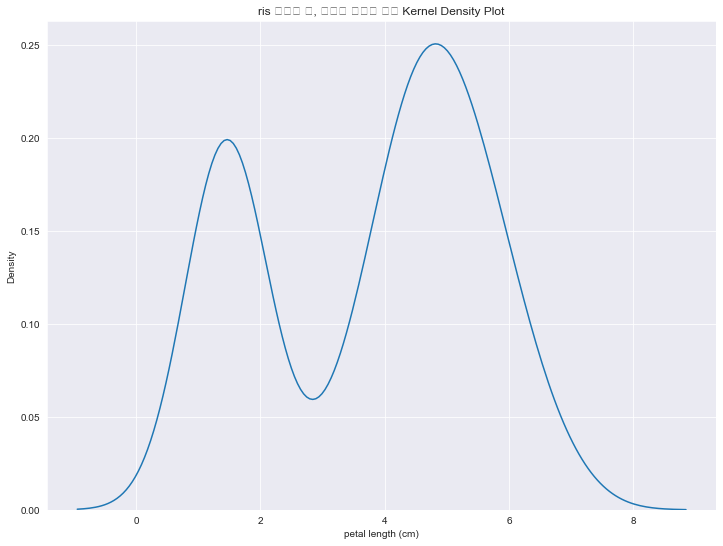

In [23]:
plt.title("ris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
sns.distplot(x, rug = False, hist = False, kde = True)

plt.show()

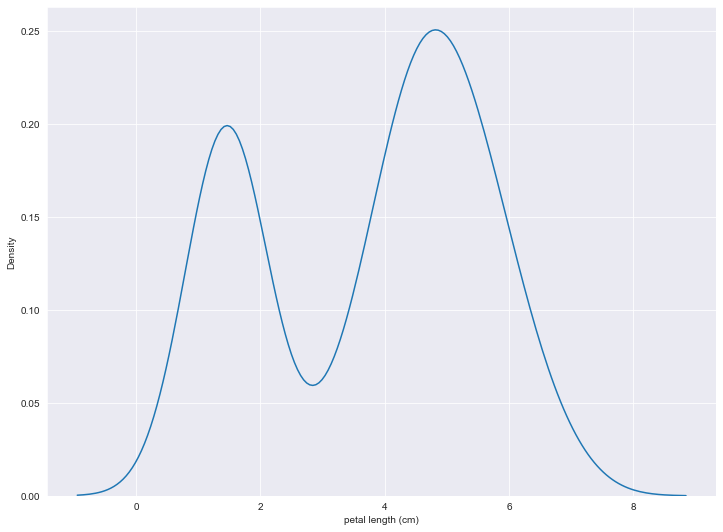

In [24]:
sns.kdeplot(x)
plt.show()

### 2.4 가로로 표현하기

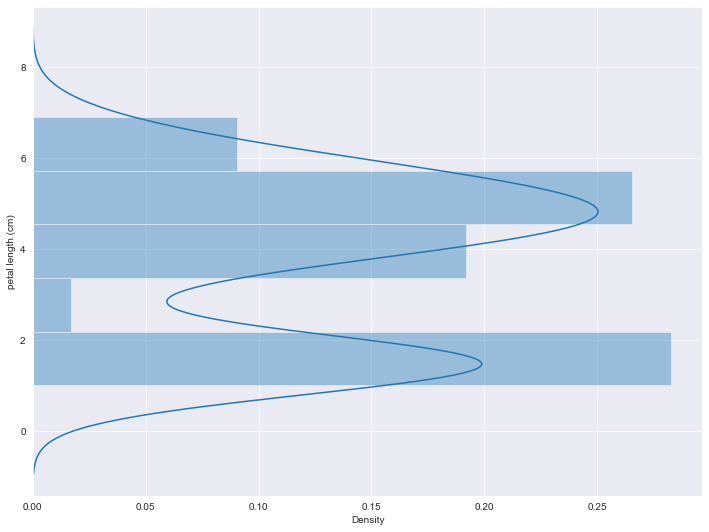

In [25]:
sns.distplot(x, vertical = True)
plt.show()

### 2.5 색상바꾸기

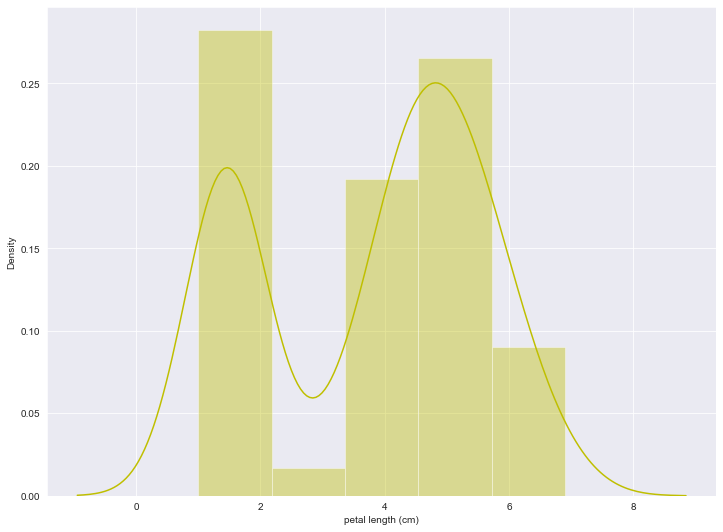

In [26]:
sns.distplot(x, color = 'y')  # 색깔은 영어의 약자임.
plt.show()

### 히트맵
* 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지위에 열분포 형태의 비쥬얼한 그래픽으로 출력하는 것이 특징
* [히트맵 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancerDF = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancerDF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3.1 기본 히트맵

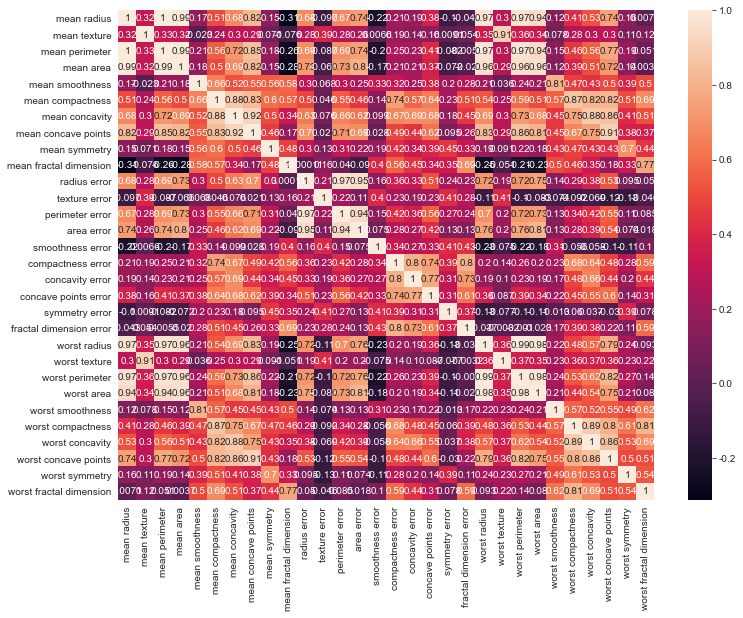

In [28]:
sns.heatmap(cancerDF.corr(), annot = True)
plt.show()

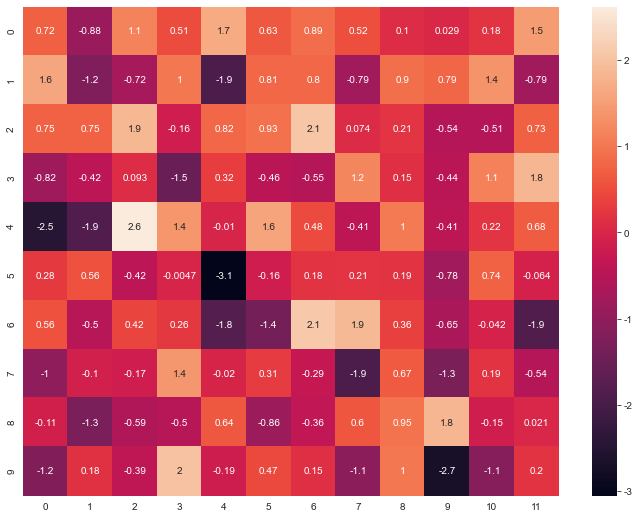

In [29]:
uniform = np.random.randn(10 , 12)
sns.heatmap(uniform, annot = True)
plt.show()

### 3.2 피봇테이블을 이용하여 구하기

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


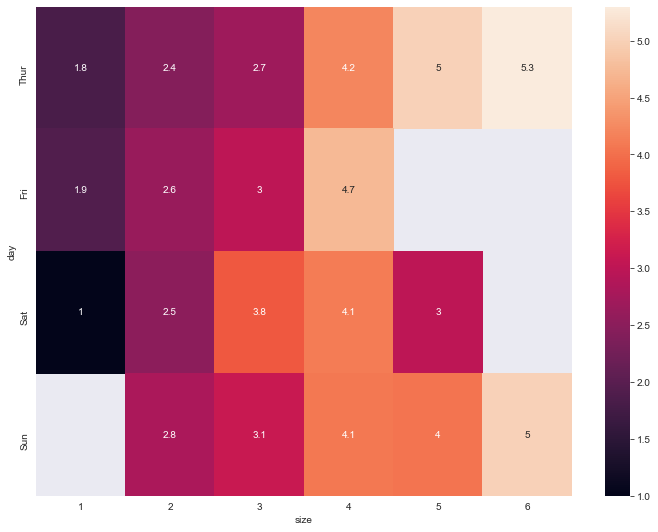

In [31]:
pivot = tips.pivot_table(values = 'tip', index = 'day', columns = 'size')
sns.heatmap(pivot, annot = True)
plt.show()

### 3.3 상관관계를 시각화
* `corr()`함수는 피처간의 상관관계를 보여준다.

In [32]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


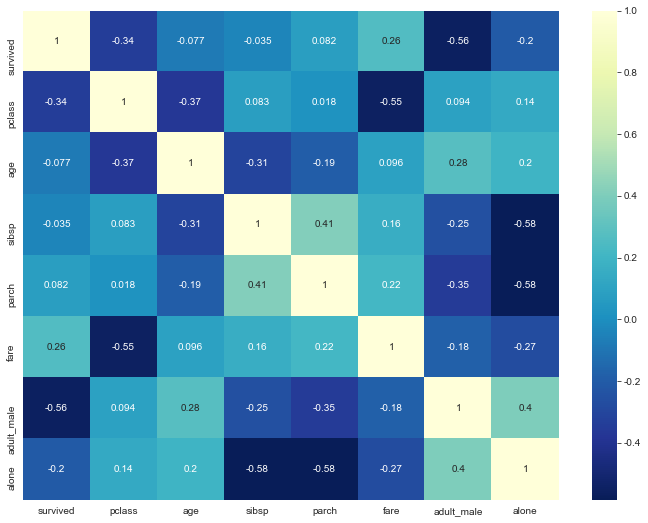

In [33]:
sns.heatmap(titanic.corr(), annot = True, cmap = "YlGnBu_r")
plt.show()

### 4.Pairplot
* [Pairplot document](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)
* pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그립니다.또한, 숫자형 column에 대해서만 그려줍니다.
* 대략적인 변수간의 값의 분포도를 보기에 좋을 것 같다.

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 4.1 Pairplot그리기

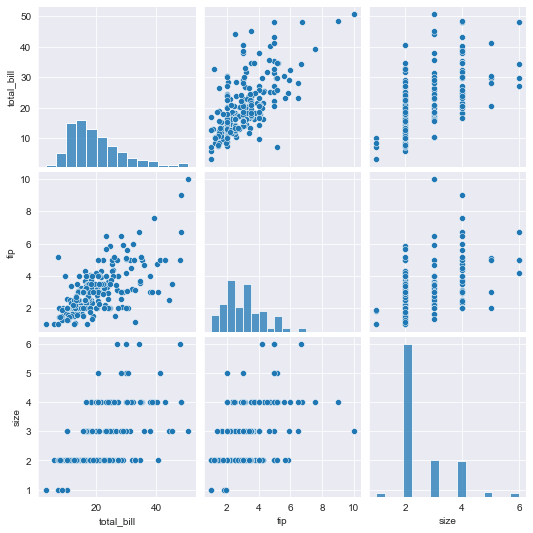

In [35]:
sns.pairplot(tips)
plt.show()

### 4.2 hue옵션으로 그리기

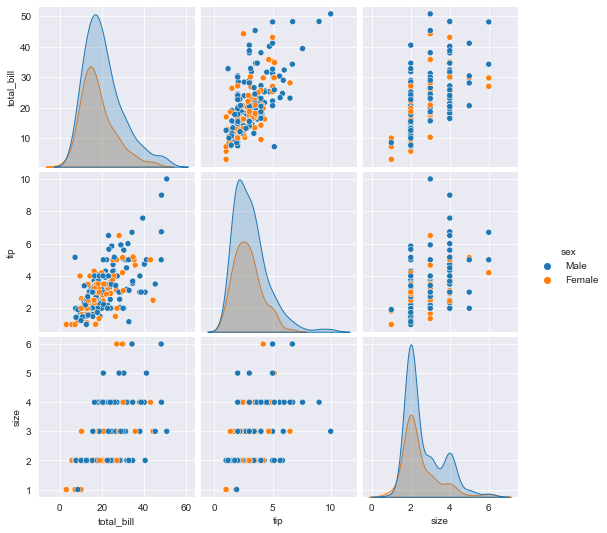

In [36]:
sns.pairplot(tips, hue= 'sex');plt.show()


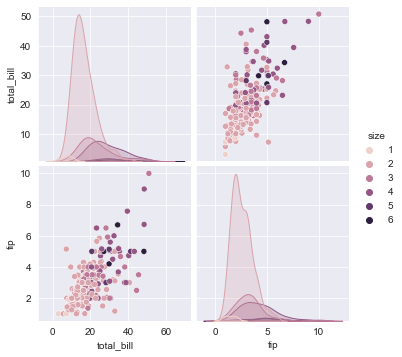

In [37]:
sns.pairplot(tips, hue= 'size')
plt.show()

### 4-3. 컬러 팔레트 적용

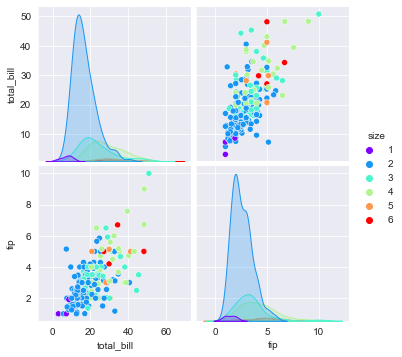

In [38]:
sns.pairplot(tips, hue= 'size', palette = 'rainbow')
plt.show()

### 4.4 사이즈 적용

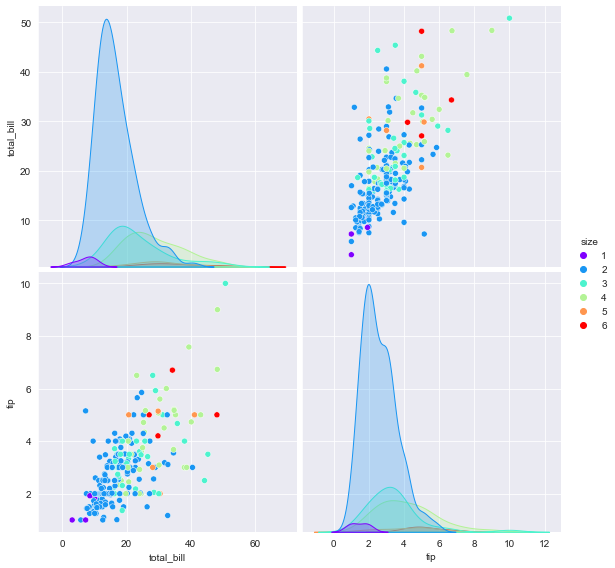

In [39]:
sns.pairplot(tips, hue= 'size', palette = 'rainbow', size = 4)
plt.show()

### 5. Violin plot
* [참조사이트](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
* 바이올린처럼 생긴 violinplot 입니다.

column에 대한 데이터의 비교 분포도를 확인할 수 있습니다.

곡선진 부분 (뚱뚱한 부분)은 데이터의 분포를 나타냅니다.

양쪽 끝 뾰족한 부분은 데이터의 최소값과 최대값을 나타냅니다.

In [40]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


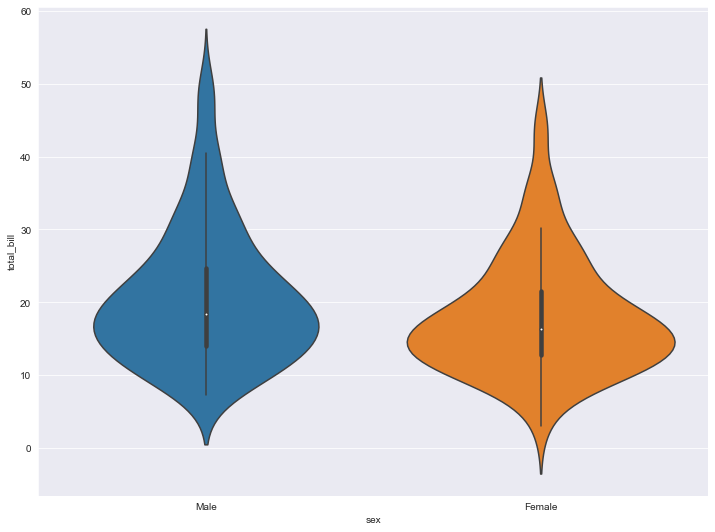

In [41]:
sns.violinplot(y = tips['total_bill'], x = tips['sex'] )

* 남자의 경우는 , 10달러에서 20달러 사이에 많이 분포되어있고, 최소값과 최대값은 각각 0, 60에 가까운 값이다.
* 여자의 경우는, 10달러에서 20달러 사이는 비슷하지만 팁은 내는 비율이 더 많은것으로 보임.

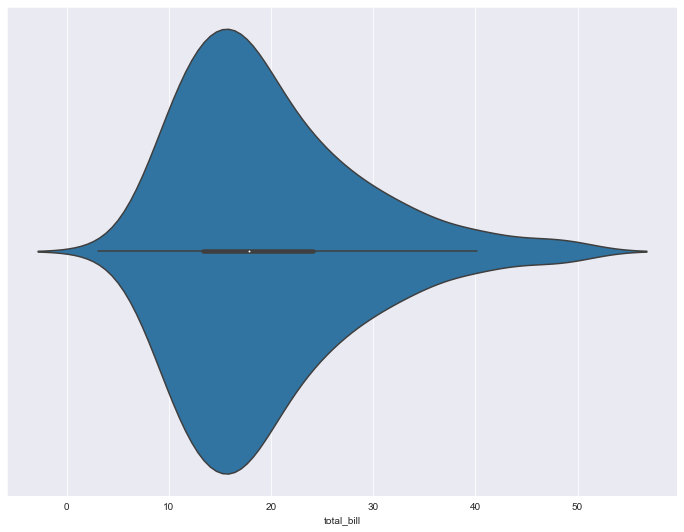

In [42]:
sns.violinplot(tips['total_bill'])

### 5-1. 비교 분포 확인
* x, y축을 지정해줌으로썬 바이올린을 분할하여 비교 분포를 볼 수 있습니다.

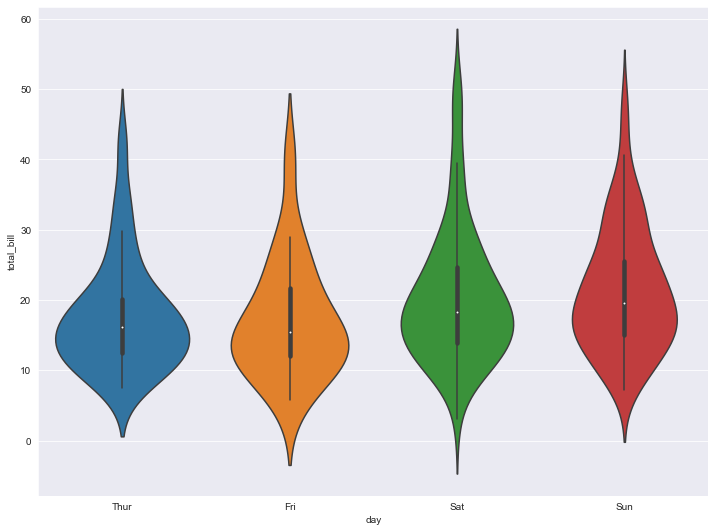

In [43]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)

### 5-2. 가로로 뉘인 바이올린 플롯
* x, y축을 지정해줌으로썬 바이올린을 분할하여 비교 분포를 볼 수 있습니다.

In [44]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


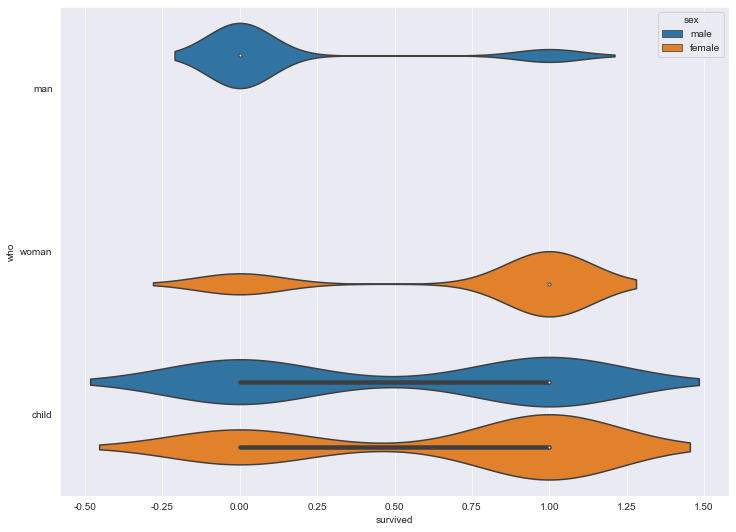

In [45]:
sns.violinplot(x = 'survived', y = 'who', data = titanic, hue='sex')
plt.show()

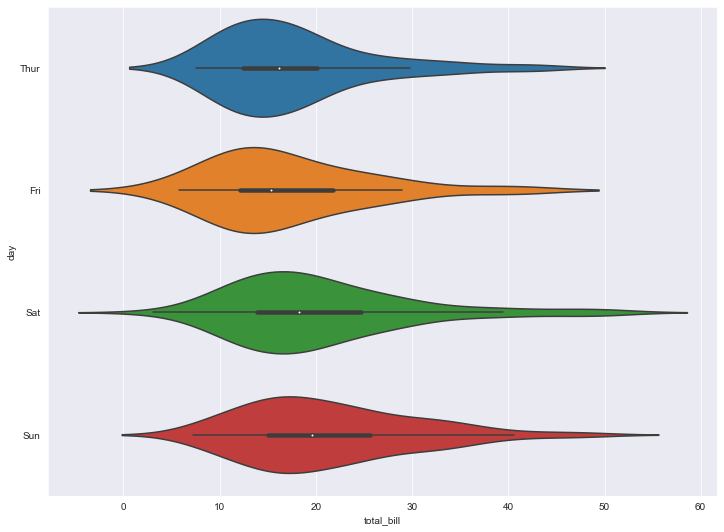

In [46]:
sns.violinplot(y = 'day', x= 'total_bill', data = tips)
plt.show()

### 5-3. hue 옵션으로 분포 비교
사실 hue 옵션을 사용하지 않으면 바이올린이 대칭이기 때문에 비교 분포의 큰 의미는 없습니다.

하지만, hue 옵션을 주면, **단일 column에 대한 바이올린 모양의 비교**를 할 수 있습니다.

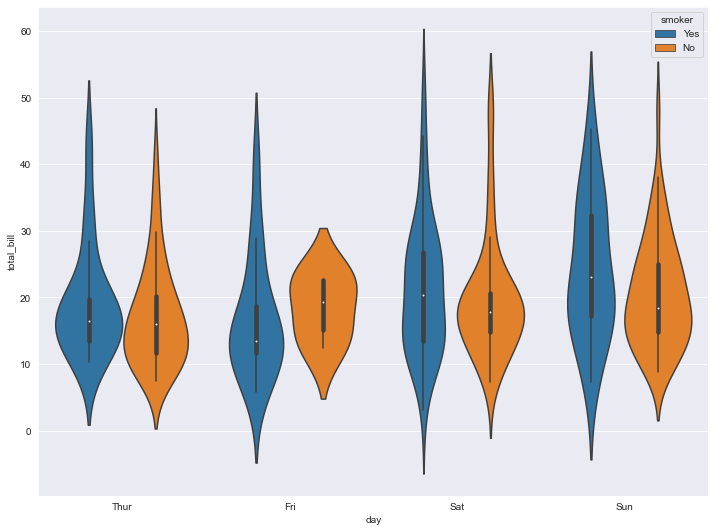

In [47]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker', pallete='muted')
plt.show()

### 5.4 split옵션으로 바이올린을 합쳐서 보기

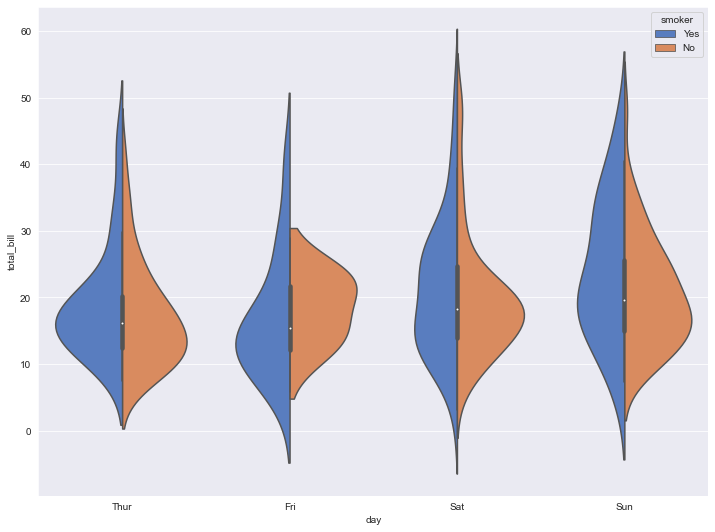

In [48]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue= 'smoker', palette = 'muted', split = True)
plt.show()

### lmplot
lmplot은 column 간의 선형관계를 확인하기에 용이한 차트입니다.

또한, outlier도 같이 짐작해 볼 수 있습니다.

[lmplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

### 6.1 기본 사용법

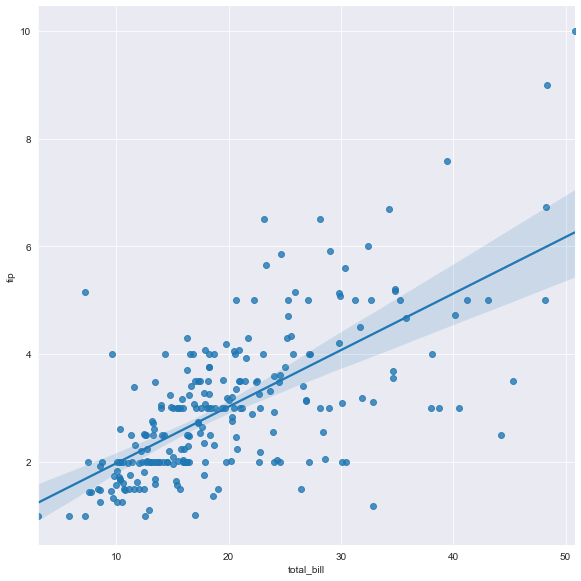

In [49]:
sns.lmplot(x = 'total_bill', y = 'tip', height = 8, data = tips)
plt.show()

### 6.2 hue옵션으로 다중 선형관계 그리기

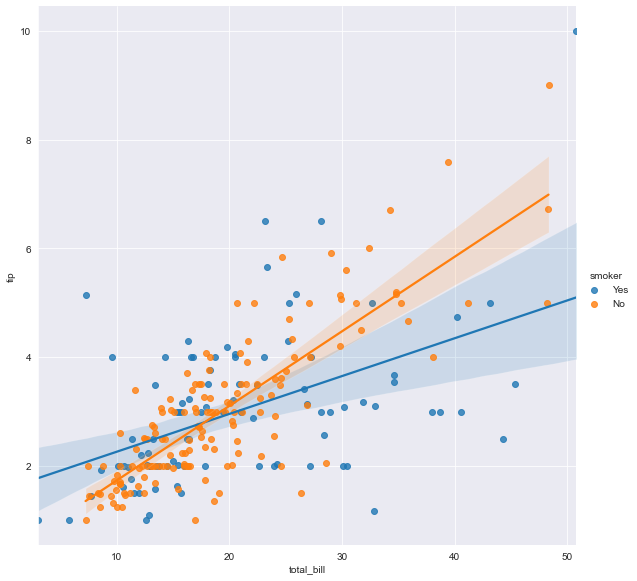

In [50]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, height = 8)

### 6.3 col 옵션을 추가하여 그래프를 별도로 그려볼 수 있습니다.
* 또한, col_wrap으로 한 줄에 표기할 column의 갯수를 명시할 수 있습니다.

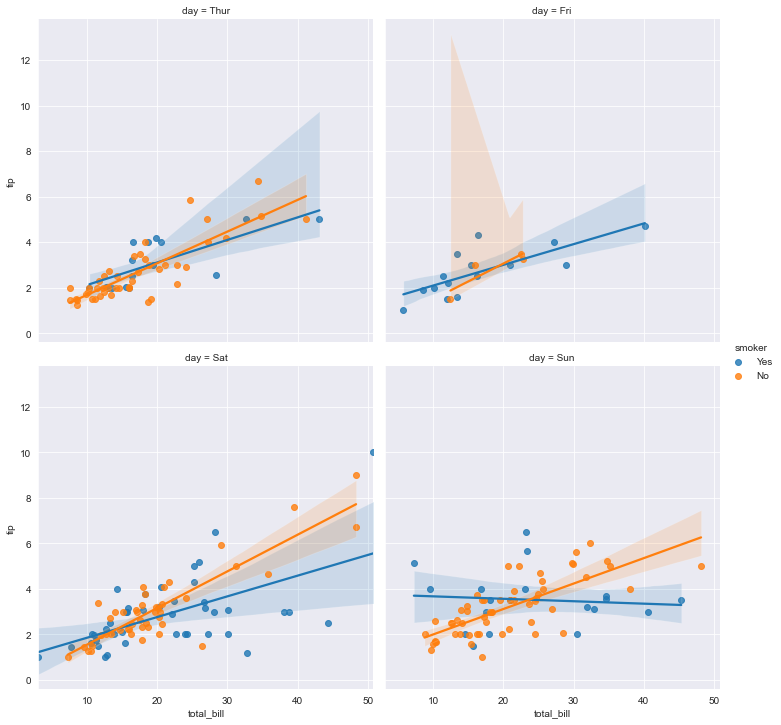

In [51]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'day', col_wrap = 2, data = tips)
plt.show()

### relplot
* 두 컬럼간 상관관계를 보지만 `lmplot`처럼 선형관계를 따로 그려주지는 않습니다.
* [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot)

### 7.1 기본 relplot
* 특정 피처의 변수간 관계를 알 수 있음.

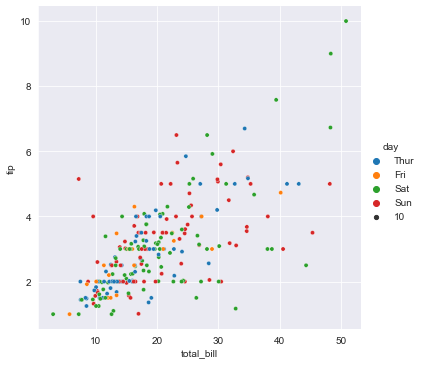

In [55]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'day', size = 10);plt.show()

### .7.2 col옵션으로 그래프 분할
* col옵션으로 동일한 관계를 더 심도있게 볼수있음.

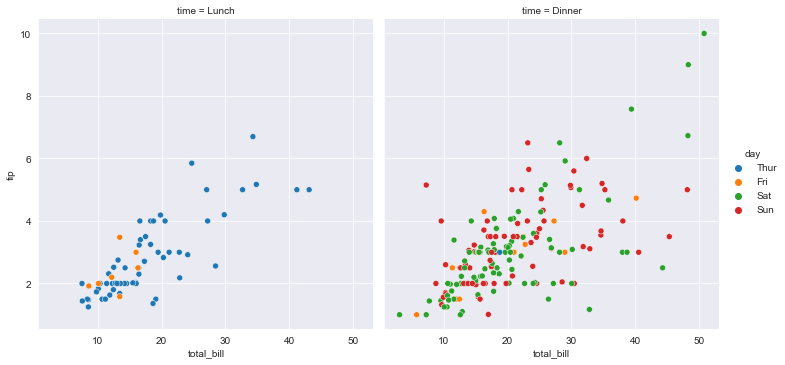

In [57]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'day', col = 'time')
plt.show()

### 7.3 row와 column에 표기할 데이터 컬럼 선택

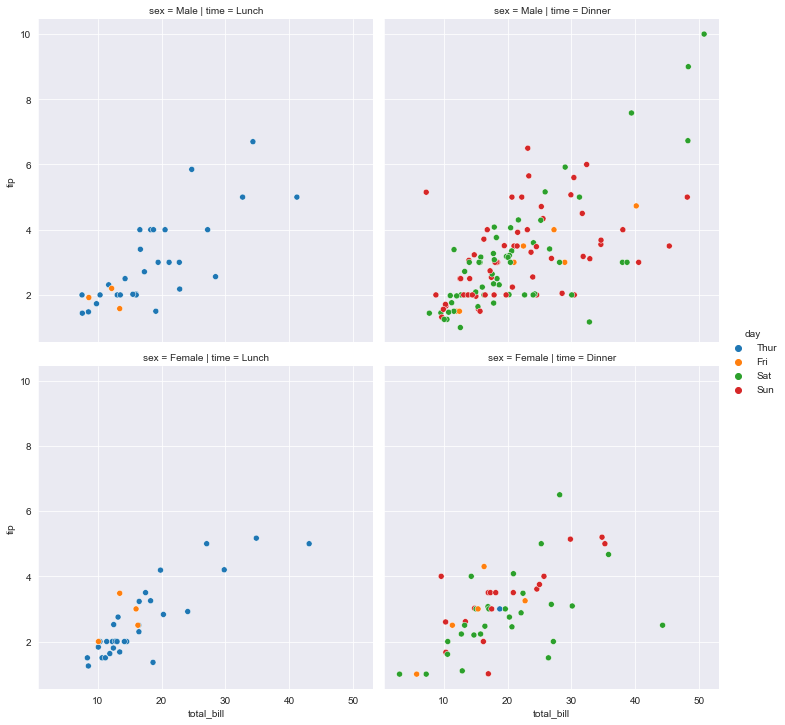

In [58]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'day', col = 'time', row = 'sex')
plt.show()

* 좀 더 입체적으로 데이터를 볼수있게 하는 것 같다.

### 7.4 컬러 팔레트 적용

In [66]:
color_palette = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

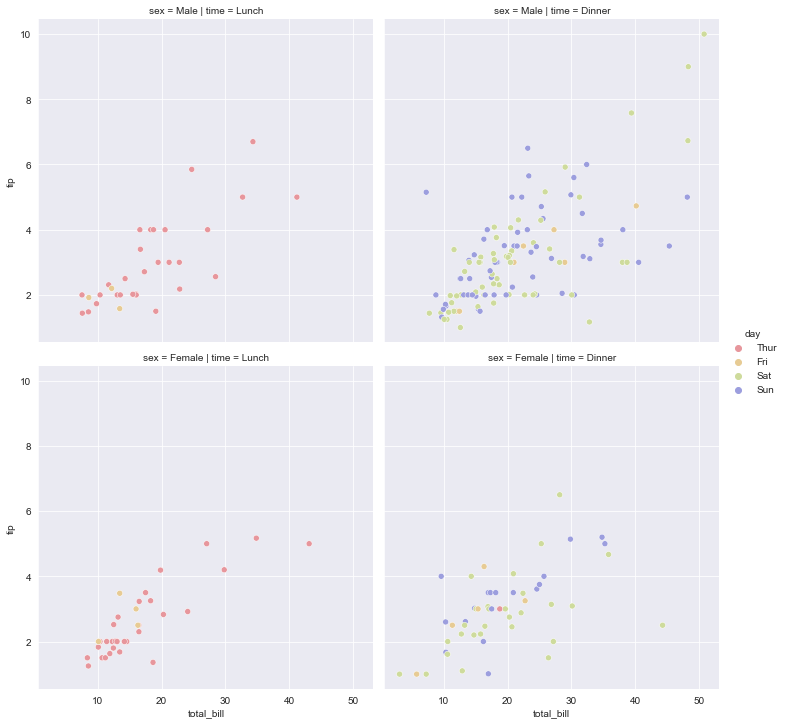

In [70]:
cpick = np.random.randint(0,high = len(color_palette))

sns.relplot(x = 'total_bill', y = 'tip', data = tips, col = 'time', row = 'sex', palette = color_palette[cpick], hue = 'day')
plt.show()

## jointplot
* scatter(산점도)dhk histogram(분포)을 동시에 그려줍니다.
* 숫자형 데이터만 표현이 가능.
* [jointplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)

### 8.1 기본 jointplot그리기

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, height = 8)
plt.show()


### 8.2 선형관계를 표현하는 regression라인 그리기
* kind = 'reg', 'kde', 'scatter', 'resid', 'hex', 'hist'
* 옵션에 **`kind = 'reg'`**을 추가하면 된다.

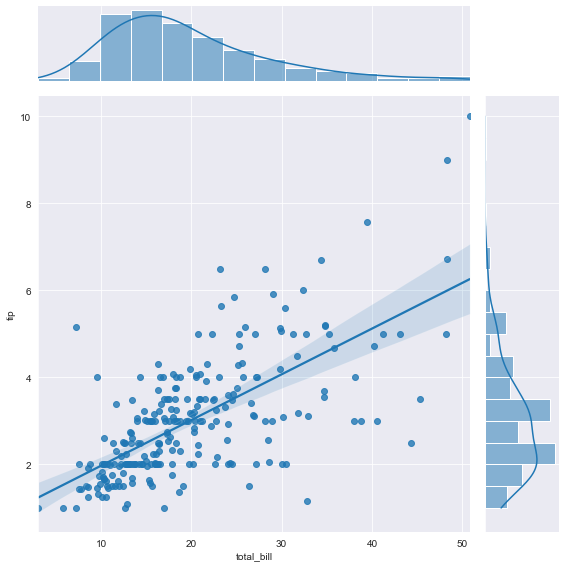

In [73]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, height = 8, kind = 'reg' )
plt.show()

### 8.3 hex밀도 보기
* **`kind = 'hex'`** 사용

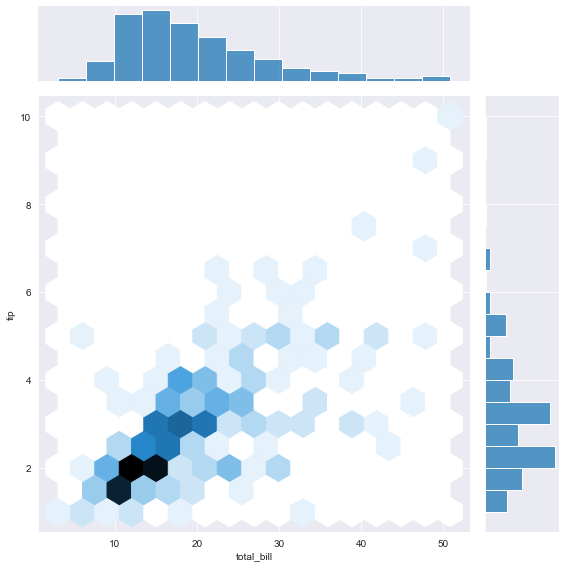

In [80]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, height = 8, kind = 'hex')
plt.show()

### 8.4 등고선 모양의 밀도 확인
* **`kind = 'kde'`** 옵션 사용

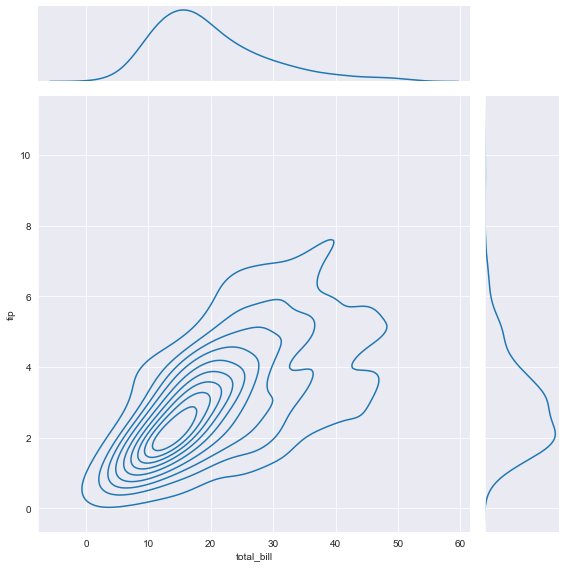

In [81]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, height = 8, kind = 'kde')
plt.show()

In [85]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


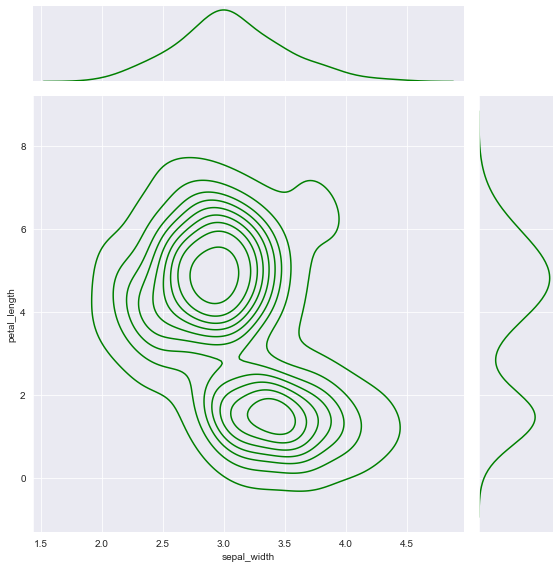

In [87]:
sns.jointplot(x = 'sepal_width',  y = 'petal_length', height = 8, data = iris, kind = 'kde', color = 'g')
plt.show()